In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the CSV file containing image names and labels
csv_file_path = "/content/drive/MyDrive/CNN/labels.csv"  # Update with your CSV file path
df = pd.read_csv(csv_file_path)

# Define image directory
image_dir = "/content/drive/MyDrive/CNN/head_ct"  # Update with your image folder path

# df['id'] = df['id'].astype(str) + '.png'


In [ ]:
import os
import pandas as pd

# Load the CSV file containing image names and labels
csv_file_path = "/content/drive/MyDrive/CNN/labels.csv"  # Update with your CSV file path
df = pd.read_csv(csv_file_path)

# Convert integer image names in the CSV file to strings with leading zeros
df['id'] = df['id'].apply(lambda x: '{:03d}.png'.format(int(x)))

# Now, rename the image files in the folder to match the format in the CSV file
image_dir = "/content/drive/MyDrive/CNN/head_ct"  # Update with your image folder path
for filename in os.listdir(image_dir):
    if filename.endswith('.png'):
        img_num = int(filename.split('.')[0])  # Extract the integer part of the filename
        new_filename = '{:03d}.png'.format(img_num)  # Format the filename with leading zeros
        os.rename(os.path.join(image_dir, filename), os.path.join(image_dir, new_filename))

# Now you can use df['image_name'] in place of "image_name_column" in the flow_from_dataframe methods.


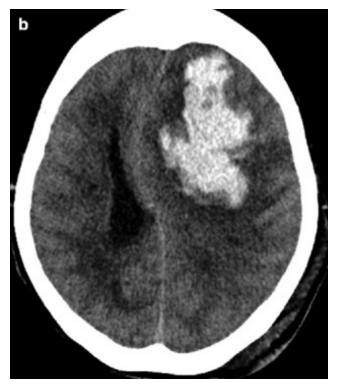

In [ ]:
from PIL import Image

# Specify the path to the image

image_path = "/content/drive/MyDrive/CNN/head_ct/"+df['id'][0]  # Update with the path to your image

# Open the image
img = Image.open(image_path)

# Display the image
img.show()
import matplotlib.pyplot as plt

# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df


,id,hemorrhage
79,079.png,1
197,197.png,0
38,038.png,1
24,024.png,1
122,122.png,0
...,...,...
106,106.png,0
14,014.png,1
92,092.png,1
179,179.png,0


In [ ]:
print(df.columns)

Index(['id', ' hemorrhage'], dtype='object')


In [ ]:
import cv2
import pandas as pd
import numpy as np

# Load the DataFrame containing image names and labels
# Assuming df contains columns 'image_name' and 'label'
# Update this part according to your actual DataFrame
# Define the image folder path
image_folder_path = "/content/drive/MyDrive/CNN/head_ct"

# Define the image size
image_size = (256, 256)

# Initialize an empty list to store the images as numpy arrays
# images = []
images = []
labels = []

# Loop through the DataFrame to load images and convert them to numpy arrays
for index, row in df.iterrows():
    # Construct the full path to the image file
    image_path = os.path.join(image_folder_path, row['id'])

    # Load the image using OpenCV
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale image

    # Resize the image to the desired size
    img = cv2.resize(img, image_size)

    # Expand dimensions to add a channel dimension
    img = np.expand_dims(img, axis=-1)

    # Normalize the image
    img = img / 255.0

    # Append the image to the list
    images.append(img)

    # Append the label to the labels list
    labels.append(row[' hemorrhage'])

# Convert the lists to numpy arrays
images_array = np.array(images)
labels_array = np.array(labels)

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images_array, labels_array, test_size=0.2, random_state=42)

# Check the shapes of training and testing data
print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Train images shape: (160, 256, 256, 1)
Train labels shape: (160,)
Test images shape: (40, 256, 256, 1)
Test labels shape: (40,)


In [ ]:

# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
from sklearn.metrics import classification_report

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

# Generate classification report
predictions = model.predict(test_images)
predicted_classes = np.where(predictions > 0.5, 1, 0)
print(classification_report(test_labels, predicted_classes))


Epoch 1/10
5/5 [==============================] - 27s 5s/step - loss: 1.9354 - accuracy: 0.5625 - val_loss: 0.7855 - val_accuracy: 0.4750
Epoch 2/10
5/5 [==============================] - 25s 5s/step - loss: 0.6919 - accuracy: 0.5688 - val_loss: 0.6825 - val_accuracy: 0.5250
Epoch 3/10
5/5 [==============================] - 24s 5s/step - loss: 0.6657 - accuracy: 0.6000 - val_loss: 0.6126 - val_accuracy: 0.6500
Epoch 4/10
5/5 [==============================] - 23s 5s/step - loss: 0.6424 - accuracy: 0.5750 - val_loss: 0.6096 - val_accuracy: 0.6250
Epoch 5/10
5/5 [==============================] - 25s 5s/step - loss: 0.5748 - accuracy: 0.6875 - val_loss: 0.5572 - val_accuracy: 0.6750
Epoch 6/10
5/5 [==============================] - 25s 5s/step - loss: 0.4950 - accuracy: 0.7375 - val_loss: 0.4739 - val_accuracy: 0.8250
Epoch 7/10
5/5 [==============================] - 24s 5s/step - loss: 0.4267 - accuracy: 0.7812 - val_loss: 0.4662 - val_accuracy: 0.8250
Epoch 8/10
5/5 [==================

In [ ]:
for i in range(len(predicted_classes)):
    print("Predicted class:", predicted_classes[i], " - True class:", test_labels[i])
